In [1]:
# Ideas tener en cuenta:
#    -la relacion entre la pagina del producto visitada y el producto comprado para todas las variables como un agg
#    -la relacion entre ingreso al home y la compra de un producto desde los distintos dispositivos
#    -ver marca contra ver producto
#    -marketing mas visitado
#    -marketing visitado vs compra
#    -dispositivo vs marketing vs compra
#    -checkout vs compra
#    -ver marca vs compra
#    -busqueda vs compra
#    -comparacion vs compra
#    -pais/cuidad/region vs marca/producto/
#    -dia/mes/hora vs visitas
#    -marketing visitado vs pais vs compra
#    -modelo/dispositivo/fuente de trafico vs checkout/compra
#    -busquedas realizadas
#    -busquedas vs compras
#    -resolution vs compras/visitas/checkout

# Ideas un poco mas desarroyadas
#    - le voy a decir retencion a cuanto avanzo el usuario hasta la compra, una retencion baja es que solo entro al home
#          una media es que por ejemplo busco un producto o comparo, y una alta es checkout o compra
#    - para hacer algo similar al new/returning pero mas util hacer algo que sea si el usuario ya compro o nunca compraron
#          y tambien tener en cuenta que marketing los llevo a comprar por primera vez
#    - necesitamos una forma de ver agrupar todas las acciones que hace un mismo usuario en una misma "sesion" es decir desde 
#          que se metio a la pagina hasta que la cerro, tenemos que ver si hacerlo viendo la diferencia de tiempo que hay entre
#          los logs, o tomando todos los logs desde el ultimo ingreso 
#    - 
#    - ver si el marketing que hacen en diferentes regiones/dispositivos/lo que sea es efectivo para los usuarios new/returning
#          y tambien para los que ya compraron/no compraron, y la retencion en todos los casos
#    - ver si la plataforma de compra es user friendly en distintos dispositivos/resoluciones/lo que sea usando la retencion
#    - ver los productos mas tentadores para los clientes usando los mas buscados/ingresados como tambien los que a los clientes
#          creen que tienen mayor valor/precio (usando las relacion entre los que compraron y los que lo 
#          buscaron/hicieron el checkout/miraron stock) tener muy en cuenta si el producto fue comparado con otro antes de comprarlo
#    - para buscar nuevas comparaciones, como no podemos hacer la matriz de correlaciones normal ya que todo es categorico
#          necesitamos hacer producto cartesiano para las variables que queremos ver si estan relacionadas

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('events.csv')
#print(df.info())

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors = 'coerce')

In [4]:
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour

In [5]:
#df.isnull().sum()

In [6]:
#df.describe(include='all')

In [7]:
df.sort_values(by=['timestamp']).sort_values(by=['person'], inplace = True)

un df para cada evento donde solo estan las columnas respectivas de ese evento

In [8]:
viewed_product_df = df.loc[df['event'] == 'viewed product'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
brand_listing_df = df.loc[df['event'] == 'brand listing'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
visited_site_df = df.loc[df['event'] == 'visited site'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
ad_campaign_hit_df = df.loc[df['event'] == 'ad campaign hit'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
generic_listing_df = df.loc[df['event'] == 'generic listing'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
searched_products_df = df.loc[df['event'] == 'searched products'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
search_engine_hit_df = df.loc[df['event'] == 'search engine hit'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
checkout_df = df.loc[df['event'] == 'checkout'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
staticpage_df = df.loc[df['event'] == 'staticpage'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
conversion_df = df.loc[df['event'] == 'conversion'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')
lead_df = df.loc[df['event'] == 'lead'].dropna(axis='columns', how = 'all').drop('event', axis = 'columns')

In [9]:
#creo una columna timediff que representa la direfenciade tiempo con el log anterior

df['timediff'] = df['timestamp'].diff()
df['timediff'] = df['timediff'].dt.total_seconds()

df['newperson']= df['person'].apply(lambda x: int(x, 16))
df['newperson'] = df['newperson'].diff()
df['newperson'] = (df['newperson'] > 0)

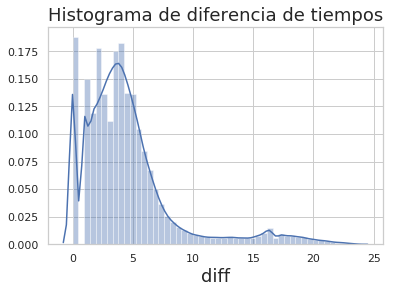

In [10]:
minidf = df.loc[(df['newperson'] == False) & (df['timediff'])]["timediff"]
minidf = np.log2(minidf)
g = sns.distplot(minidf)
g.set_title("Histograma de diferencia de tiempos", fontsize=18)
g.set_xlabel("diff",fontsize=18)
#tomamos minimo local antes del maximo local de las 24 horas como 2^14seg (14 en minidfs)
maxtime = 16368

In [11]:
#reo nuevas columnas booleanas para ver si el log es de cierto evento, y tambien para ver si una add lo llevo directamente a la pagina del producto o marca

df['viewed_product'] = (df['event'] == 'viewed product')
df['brand_listing'] = (df['event'] == 'brand listing')
df['visited_site'] = (df['event'] == 'visited site')
df['ad_campaign_hit'] = (df['event'] == 'ad campaign hit')
df['generic_listing'] = (df['event'] == 'generic listing')
df['searched_products'] = (df['event'] == 'searched products')
df['search_engine_hit'] = (df['event'] == 'search engine hit')
df['checkout'] = (df['event'] == 'checkout')
df['staticpage'] = (df['event'] == 'staticpage')
df['conversion'] = (df['event'] == 'conversion')
df['lead'] = (df['event'] == 'lead')
df['ad_url_model'] = ((df['url'].str.count('/') == 3) & (df['url'].str.contains('comprar')))
df['ad_url_brand'] = ((df['url'].str.count('/') == 2) & (df['url'].str.contains('comprar')))

In [12]:
# creo una columna entry que me diga el numero de ingreso en el que ocurre cada log, tomando que es un nuevo ingreso
#  cuando cambia de persona o cuando paso mas tiempo que maxtime desde el ultimo log

df['newentry'] = ((df['timediff'] > maxtime) | (df['newperson']))
df['entry'] = df['newentry'].cumsum()
#df['newentry'].value_counts()
#df.loc[df['conversion']]
#print(df[['entry', 'person', 'newperson']])

In [13]:
# Creo un nuevo df en el cual cada fila corresponde a un entry, en el que se suman la cantidad de eventos que ocurrieron en ese entry
# se toma el primer valor de ciertas columnas que hablan de las condiciones del usuario, como la ubicacion, tiempo, resolucion, sistema operativo, etc
# se enlistan los valores de las columnas donde puede haber varios valores importantes en un mismo ingreso, como los modelos

def concatenar(serie):
    resul = str('')
    for i in serie:
        if not pd.isnull(i):
            resul = resul+str(i)
    return resul

def primero(serie):
    lista = []
    for i in serie:
        if not pd.isnull(i):
            lista.append(i)
            break
    if lista:
        return lista.pop(0)
    return np.nan

def listar(serie):
    lista = []
    for i in serie:
        if not pd.isnull(i):
            lista.append(i)
    if lista:
        return lista
    return []
    
#print(df.columns)

dict1 = ({'timestamp':primero, 'person':primero, 'sku':listar, 'model':listar, 'condition':listar,'storage':primero, 'color':listar, 'skus':listar, 
          'search_term':listar, 'staticpage':'sum','campaign_source':primero, 'search_engine':primero, 'channel':primero, 'new_vs_returning':primero,
          'city':primero, 'region':primero, 'country':primero, 'device_type':primero, 'screen_resolution':primero, 'operating_system_version':primero, 
          'browser_version':primero, 'day_of_week':primero, 'month':primero,'hour':primero, 'viewed_product':'sum', 'brand_listing':'sum',
          'visited_site':'sum', 'ad_campaign_hit':'sum', 'generic_listing':'sum','searched_products':'sum', 'search_engine_hit':'sum', 'checkout':'sum', 
          'conversion':'sum','lead':'sum', 'ad_url_model':'sum', 'ad_url_brand':'sum', 'newperson':primero})

entrydf = df.groupby('entry').agg(dict1)
#print (entrydf)
#print(entrydf.isna().sum())


In [14]:
# a cada entry se le calcula la retencion, que corresponde al evento mas importante que ocurrio en el ingreso

def calcular_retencion(df):
    if df['conversion'] > 1:
        return 'multiple_conversions'
    
    if df['conversion'] > 0:
        return 'conversion'
    
    if df['checkout'] > 0:
        return 'checkout'
    
    if df['lead'] > 0:
        return 'lead'
    
    if df['searched_products'] > 0:
        return 'searched_products'
    
    if ((df['viewed_product'] > 0) & (df['ad_url_model'] == 0)) | (df['viewed_product'] > 1):
        return 'viewed_product'
    
    if ((df['brand_listing'] > 0) & (df['ad_url_brand'] == 0)) | (df['brand_listing'] > 1):
        return 'brand_listing'
    
    if df['generic_listing'] > 0:
        return 'generic_listing'
    
    if df['search_engine_hit'] > 0:
        return 'search_engine_hit'
    
    if df['visited_site'] > 0:
        return 'visited_site'
    
    return 'ad_campaing_hit' #el default es esto porque por algun motivo algunos logs que solo hacian ad_campaing_hit se quedaban sin esta columna
    
entrydf['retention'] = entrydf.apply(calcular_retencion, axis=1).astype('category')

In [15]:
#entrydf['already_buyed'] = ()
#print(entrydf['newperson'].value_counts())
#df['newperson'].value_counts()

In [16]:
# se crean columnas que representan un booleano se si esa oersina ya habia comprado antes de esa entry y una que dice si esa es la primera entry en la que hace una conversion

def ya_compro(df):
    lista = []
    for i in range(1, len(df.index)):
        lista[i] = (df['conversion'][i] > 0)
    for i in range(1, len(df.index)):
        lista[i] = (lista[i-1]) & (not df['newperson'][i])
    return lista

entrydf['already_buyed'] = (entrydf['conversion'] > 0)
entrydf['already_buyed'] = entrydf.groupby('person')['already_buyed'].cumsum()
entrydf['already_buyed'] = (entrydf['already_buyed'] > 0) & (entrydf['already_buyed'].shift(1) > 0)
entrydf['first_convertion'] = ((entrydf['retention'] == 'conversion') | (entrydf['retention'] == 'multiple_conversions')) & (entrydf['already_buyed'] == False)

#entrydf.loc[entrydf['person'] == '00204059']
#entrydf.loc[(entrydf['first_convertion'] == True)]

In [17]:
df["storage"] = df["storage"].astype('category')
#print(entrydf.columns)

In [18]:
lista_total = []
lista_sin_repetidos = []
for i in entrydf['model']:
    if len(i) == 0:
        continue
    lista_total.append(i)
    if(len(i)>1):
        for j in i:
            if j not in lista_sin_repetidos:
                lista_sin_repetidos.append(j)
    elif( len(i) == 1):
        if i not in lista_sin_repetidos:
                lista_sin_repetidos.append(i)
    
print(len(lista_total))
print(len(lista_sin_repetidos))

64593
373
